# Communities and Crime Data Set

In [392]:
import pandas as pd
import numpy as np

## Wczytywanie danych

In [458]:
names = !cat './dataset/communities.names' | awk 'NR>=76 && NR<=203 { print $2 }' # nazwy kolumn
informations = !cat './dataset/communities.names' | awk 'NR>=213 && NR<=340 { $1=""; $2=""; print }' # opisy kolumn
attributes = dict(zip(names, informations)) # słownik - nazwa kolumna oraz opis

In [459]:
# kolumny zawierające zmienne jakościowe (kategoryczne)
cols_not_predictive = !cat 'dataset/communities.names' | sed '213,340!d' | grep 'not predictive\|not counted as predictive' | awk '{print substr($2, 1, length($2)-1)}'

In [394]:
input_data = pd.read_csv('dataset/communities.data', header=None, names=names)

In [395]:
len(input_data) # liczba wierszy

1994

In [396]:
input_data.shape # liczba wierszy oraz kolumn

(1994, 128)

## Przeglądanie danych

In [397]:
input_data.tail() # oglądamy wstępnie dane

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19
1993,6,?,?,Ontariocity,10,0.20,0.78,0.14,0.46,0.24,...,0.11,0.30,0.05,0.08,0.04,0.73,0.5,1.00,0.13,0.48


In [398]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [448]:
input_data.describe() # metoda dostarczająca statystyczne informacje o danych w kolumnach
input_data.describe().T # transpozycja ww. tabeli

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [457]:
input_data['communityname'].value_counts().head(10)

Jacksonvillecity    5
Auburncity          5
Greenvillecity      5
Springfieldcity     4
Salemcity           4
Lebanoncity         4
Albanycity          4
Athenscity          4
Lafayettecity       4
Lakewoodcity        3
Name: communityname, dtype: int64

## Typy danych w zbiorze

In [408]:
input_data.dtypes.value_counts() # wszystkie typy danych przed zmianą ty

float64    100
object      26
int64        2
dtype: int64

In [411]:
df = input_data.copy()
cols_numeric = df.columns.drop('communityname') # wszystkie kolumny z wyjątkiem communityname
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce') # konwersja wartości na liczby

In [412]:
df.dtypes.value_counts() # wszystkie typy danych

float64    125
int64        2
object       1
dtype: int64

In [413]:
all(isinstance(i, str) for i in df['communityname']) # sprawdzenie, czy kolumna communityname zawiera tylko stringi

True

## Sprawdzanie danych pod kątem wartości pustych

In [433]:
cols_NaN = df.columns[df.isna().any()].tolist() # kolumny zawierające nieznane wartości

In [415]:
len(cols_NaN) # liczba kolumn zawierających nieznane wartości

25

In [416]:
df_notnull = df.drop(cols_NaN, axis=1) # usunięcie kolumn zawierających nieznane wartości

In [495]:
pd.isnull(df[cols_NaN]).sum() # liczba wierszy zawierające brakujace wartosci

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

In [510]:
# zatem usuniemy jeden wiersz zawierający pustą wartość w kolumnie OtherPerCap
df.dropna(subset=['OtherPerCap'], inplace=True) 

In [509]:
# [attributes[x] for x in cols_NaN] # opis kolumn z nieznanymi wartościami

In [502]:
sum([True for idx,row in df.iterrows() if any(row.isnull())]) # zliczanie wierszy, które mają brakujące wartości

1870

In [503]:
sum(df.isnull().values.ravel()) # liczenie komórek brakujących wartości

39177

In [505]:
len(df.dropna()) # liczba wierszy niezawierajacych nieznane wartości

123

## Eksploracja danych

In [469]:
import matplotlib.pyplot as plt

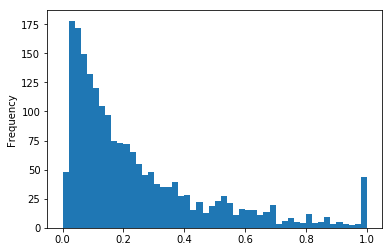

In [493]:
df.ViolentCrimesPerPop.plot(kind = 'hist', bins=50)

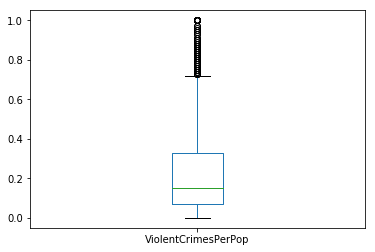

In [494]:
df.ViolentCrimesPerPop.plot.box()

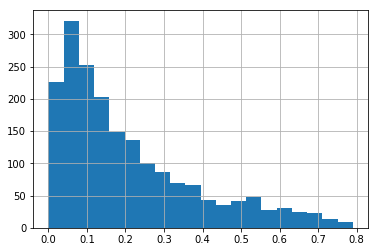

In [512]:
df[df.ViolentCrimesPerPop < 0.8].ViolentCrimesPerPop.hist(bins=20) # histogram

In [447]:
# [attributes[x] for x in cols_NaN]
# all(isinstance(i, str) for i in df['communityname'])
# list(filter(lambda elm: isinstance(elm, np.object), df[columns_NaN]))


# df.select_dtypes(exclude=[np.number])
# list(df.select_dtypes(exclude=[np.number]).columns) 